In [1]:
# C

# CNN(Convolution Neural Network)
- 이미지 영상 처리에 사용되는 신경망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
- 사용되는 Layer
    * ConvXD : 이미지 형태 그대로 입력 받아 특징을 추출하는 레이어
    * Polling : 특징맵에서 특징을 다시 추출, 다운샘플링하는 레이어, 크기를 반으로 줄임

In [2]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# W, B 고정
set_random_seed(11)

### [1] 데이터 준비 및 로딩

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
print(f'훈련 입력 데이터 : {train_input.shape}', f'훈련 타겟 데이터 : {train_target.shape}')
print(f'테스트 입력 데이터 : {test_input.shape}', f'테스트 타겟 데이터 : {test_target.shape}')

훈련 입력 데이터 : (60000, 28, 28) 훈련 타겟 데이터 : (60000,)
테스트 입력 데이터 : (10000, 28, 28) 테스트 타겟 데이터 : (10000,)


### [2] 데이터 전처리 및 학습형태로 변환

In [6]:
# 스케일링
train_input = train_input / 255.0
test_input = test_input / 255.0

In [7]:
# Conv 레이어는 이미지의 채널 정보까지 입력
train_input= train_input.reshape(-1, 28, 28, 1)
test_input= test_input.reshape(-1, 28, 28, 1)

In [8]:
print(f'훈련 입력 데이터 : {train_input.shape}')
print(f'테스트 입력 데이터 : {test_input.shape}')

훈련 입력 데이터 : (60000, 28, 28, 1)
테스트 입력 데이터 : (10000, 28, 28, 1)


In [9]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
stratify = train_target, random_state=11)

### [3] 모델 구성 및 생성
- 입력 형태 : 채널 정보까지 포함 3차원 (28, 28, 1)
- 출력 형태 : 0 ~ 9까지 정수 확률값 10개 출력
- 학습 방식 : 분류 중에서 다중분류
- 전반부
    * 이미지 특징 추출
        - Con2D, MaxPoll2D
- 후반부
    * 이미지 데이터 학습
        - Flatten, Dense

In [10]:
train_input.shape, train_target.shape

((45000, 28, 28, 1), (45000,))

#### [3] - 1 모델 구상

In [11]:
model = Sequential()

# 이미지 특징 추출 Layer => 첫번째 입력값 설정, 흑백이니까 input 값이 1
model.add(Conv2D(1, kernel_size = 3, padding = 'same', input_shape = (28, 28, 1)))

# 이미지 특징 다운샘플링 해주는 Layer => MaxPoll2D
model.add(MaxPool2D(pool_size = (2,2)))

# 이미지를 1차원으로 변환시켜주는 Layer
model.add(Flatten())

# 출력층 => Node : 10(0-9), activation : softmax
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 1)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 196)               0         
                                                                 
 dense (Dense)               (None, 10)                1970      
                                                                 
Total params: 1,980
Trainable params: 1,980
Non-trainable params: 0
_________________________________________________________________


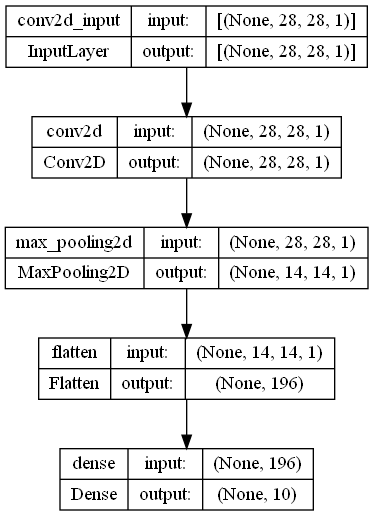

In [13]:
plot_model(model, show_shapes=True)

#### [3] - 2 모델 생성
---  
- complie 메서드
    * loss 손실 함수 : 다중에 인코딩을 안했으니까 sparse_categorical_crossentropy
    * optimizer 최적화 : adam
    * metrics 평가항목 : acuuracy

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer='adam',
metrics='accuracy')

#### [3] - 3 모델 학습
- fit 메서드
    - 학습 데이터, 라벨
    - epochs : 학습 횟수
    - batch_size : 학습 분량
    - validation_data : 검증 데이터, 검증 라벨
    - validataion_split 학습데이터의 일부 비율 설정(ex, 0.2)
    - callback
    - verbose : 학습 진행도 화면 출력 여부 설정

In [15]:
model.fit(train_input, train_target)

1407/1407 [==============================] - 7s 4ms/step - loss: 0.7114 - accuracy: 0.7566


### [4] 평가

In [27]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.5527 - accuracy: 0.8038


[0.5527396202087402, 0.8037999868392944]

### [5] 테스트
--- 
- 새로운 데이터

In [30]:
test_input[0].shape

(28, 28, 1)

In [34]:
pre_target = model.predict(test_input[0].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 17ms/step


In [36]:
pre_target, pre_target.shape

(array([[2.39944643e-06, 6.85727264e-06, 6.29907445e-05, 5.68325595e-05,
         8.77530038e-05, 3.26368928e-01, 1.03373655e-04, 4.57038015e-01,
         2.80657806e-03, 2.13466287e-01]], dtype=float32),
 (1, 10))

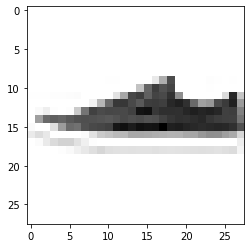

In [40]:
plt.imshow(val_input[0].reshape(28, 28), cmap = 'gray_r')